In [1]:
# THIS CELL ONLY EXECUTE ONE TIME FOR DOWNLOAD DATA

# Download and unzip data from kaggle datasets with download-data script
import os

current_path = os.getcwd()

def path_verify():
    # modify path to execute script
    path = "C:\\Users\\user\\AzureMl_customized"
    #validate if current path is correct path
    if current_path != path:
        os.chdir(path=path)
        print(os.getcwd())

if os.path.isfile("C:\\Users\\user\\AzureMl_customized\\experimentation\\data\\training.csv"):
    print("The data has already been downloaded!. Please check your /data folder")
else:
    #if windows os
    if os.name == 'nt':
        path_verify()
        # Is necessary click "yes" when cmd administrator level launch
        os.system("download-data.bat")
        # return to the notebook's parent path
        os.chdir(path=current_path)
        print(os.getcwd())
    # Linux
    else:
        path_verify()
        os.system("download-data.sh")
        os.chdir(path=current_path)
        print(os.getcwd())


C:\Users\user\AzureMl_customized
c:\Users\user\azure-ml-customized\experimentation


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              AdaBoostClassifier)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (auc, 
                             roc_curve,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             RocCurveDisplay,
                             PrecisionRecallDisplay)

In [3]:
df = pd.read_csv("./data/training.csv")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [5]:
df.shape

(953, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [7]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


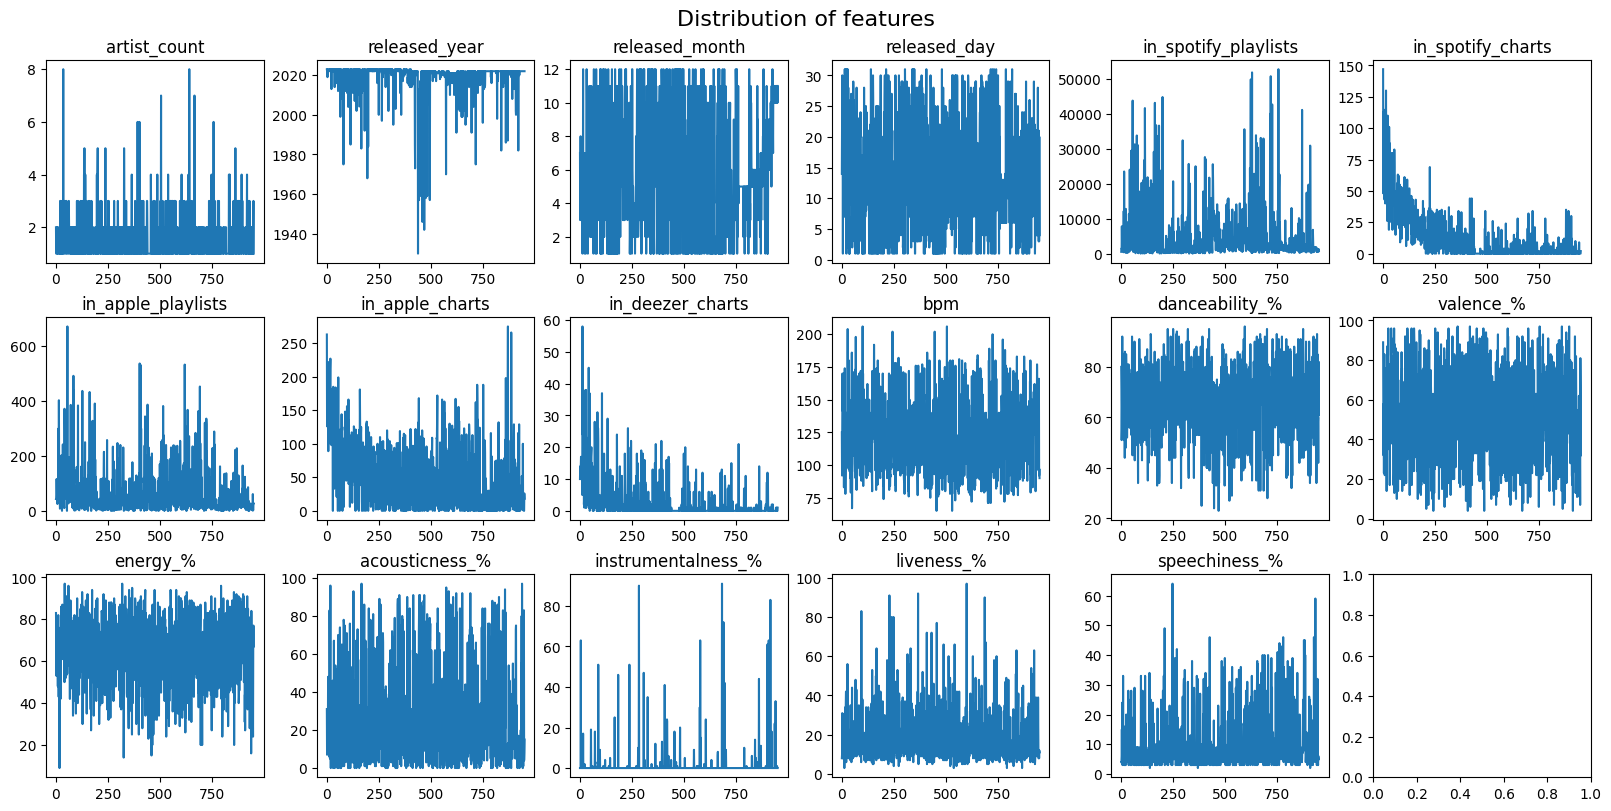

In [9]:
#let's see distribution in features

number_columns = df.select_dtypes('number').columns
fig, axs = plt.subplots(3,6, figsize=(16,8), constrained_layout=True)
fig.suptitle("Distribution of features", fontsize=16)
counter = 0
finalize = False
for row in axs:
    for col in row:
        col.plot(df[number_columns[counter]], )
        col.set_title(f"{number_columns[counter]}")
        counter += 1
        if counter == (len(number_columns)):
            finalize = True
            break
    if finalize:
        break


From the above figure we can preliminarly understand that:

1. artist_count commonly includes less than 3 artists. 
2. The trend in the platform's charts is relatively homogeneous.
3. Most of the songs in the data set were released after 2020.
4. Most of the songs in the data set were released between May 8 and May 14.

In [ ]:
#let's we see a plot pairwise relationships chart
plots = sns.pairplot(df)

#uncomment this line for save the plot
#plots.savefig("pairplot.png")

In [ ]:
# A heatmap chart

sns.heatmap(df.select_dtypes("number"), cmap="RdPu")

<Axes: >

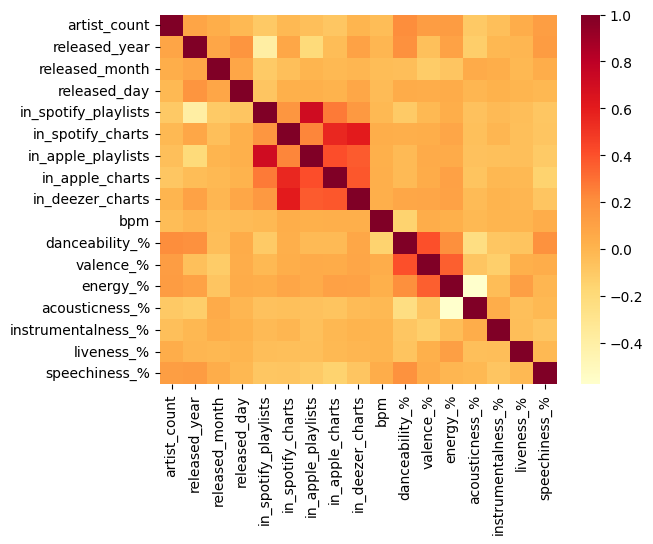

In [11]:
# A correlation chart

df_corr = df.corr()
sns.heatmap(df_corr, cmap="YlOrRd")

In [12]:
df_corr[(df_corr.values >= 0.5) & (df_corr.values < 1)].drop_duplicates()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
in_spotify_playlists,-0.101966,-0.392204,-0.104757,-0.079669,1.000000,0.164331,0.708277,0.271317,0.144342,-0.019598,-0.106534,-0.021883,0.033808,-0.064421,-0.028134,-0.046695,-0.089722
in_spotify_charts,-0.018507,0.069678,-0.047623,0.021877,0.164331,1.000000,0.233354,0.552232,0.600205,0.034713,0.030071,0.035531,0.081920,-0.054987,-0.010146,-0.047552,-0.081765
in_apple_playlists,-0.051074,-0.198998,-0.000164,0.026410,0.708277,0.233354,1.000000,0.414523,0.369032,0.023725,-0.025326,0.057075,0.052615,-0.061781,-0.057219,-0.049596,-0.108011
in_apple_charts,-0.088597,-0.035842,-0.019064,0.011086,0.271317,0.552232,0.414523,1.000000,0.383668,0.030962,-0.025204,0.047733,0.104828,-0.076793,-0.013145,-0.018733,-0.151539
in_deezer_charts,-0.003732,0.095389,-0.005286,0.073288,0.144342,0.600205,0.369032,0.383668,1.000000,0.028036,0.070913,0.076196,0.094627,-0.029361,0.005398,-0.007568,-0.080555


From the above cell we understand:

1. The high probability that if a song is on in_spotify_playlists it is also on in_apple_playlists
2. In_deezer_charts have most correlation with in_spotify_charts that with in_apple_charts
3. The smaller the number of artists in a song, the greater the probability that it will be in more playlists.
4. The older a song is, the less likely it is to be found on playlists.


In [8]:
#lets we analyze the null values

nulls = df.isnull().sum()
nulls[nulls.values > 0]
#nulls[nulls.values > 0].index

in_shazam_charts    50
key                 95
dtype: int64

In [9]:
columns_with_null_values = []
for i, column in zip(range(len(df.columns)), df.columns):
    if ((column in nulls.index) and (nulls.values[i] > 0)):
        columns_with_null_values.append(column)

df_null_values = df[columns_with_null_values]
df_null_values

,in_shazam_charts,key
0,826,B
1,382,C#
2,949,F
3,548,A
4,425,A
...,...,...
948,0,A
949,0,F#
950,0,C#
951,0,C#


In [10]:
# let's complete null/NaN values

df2 = df.copy()

df2["in_shazam_charts"] = df["in_shazam_charts"].apply(lambda x: float(str(x).replace(',', '')) 
                                                if (',' in str(x)) else float(x))

#fillna in_shazam_charts
df2["in_shazam_charts"].fillna(df2["in_shazam_charts"].mean(), inplace=True)
df2["in_shazam_charts"].isnull().sum()

0

In [11]:
#fillna key: mode = C#

mode = df2["key"].mode()
print("mode:", mode.values[0])
df2["key"].fillna(mode.values[0], inplace=True)
df2["key"].isnull().sum()

mode: C#


0

In [12]:
df2.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

The mean in_spotify_playlists column: 5200.12


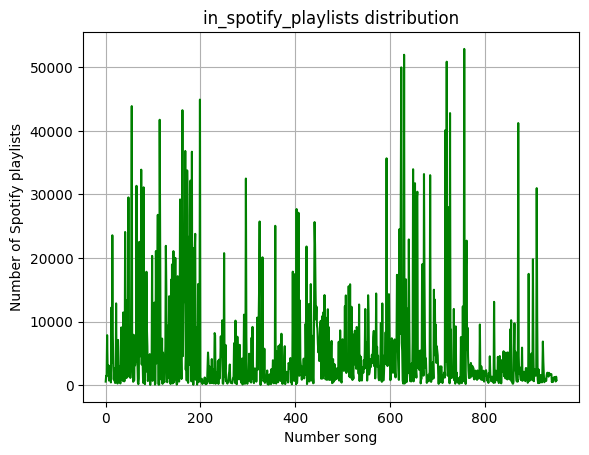

In [13]:
#lets see in_spotify_playlist column like tentative target column 
in_spotify_playlists = df2.in_spotify_playlists.values
print("The mean in_spotify_playlists column: %.2f" % in_spotify_playlists.mean())
df.in_spotify_playlists.plot(color="green", grid=True)
plt.title("in_spotify_playlists distribution")
plt.xlabel("Number song")
plt.ylabel("Number of Spotify playlists")
plt.show()


in_spotify_playlists is a good column for the classification exercise because it is well distributed and apparently without outliers.

In [14]:
# Let's transform this column as the target column like this: 
# all values ​​above the mean will be assumed as very successful (1)
# and from the mean down as normal (0)

df3 = df2.copy()

df3.loc[df3["in_spotify_playlists"] < int(in_spotify_playlists.mean()), "in_spotify_playlists"] = 0
df3.loc[df3["in_spotify_playlists"] >= int(in_spotify_playlists.mean()), "in_spotify_playlists"] = 1

df3.in_spotify_playlists.unique()

array([0, 1], dtype=int64)

In [15]:
# transform the released_year to age_of_song

df4 = df3.copy()
df4.rename(columns={"released_year": "age_of_song"}, inplace=True)

df4["age_of_song"] = df4["age_of_song"].apply(lambda x: 2023-x)
df4["age_of_song"].unique()

array([ 0,  4,  1, 10,  9,  5,  6,  3,  7, 11, 24, 15, 48,  2,  8, 12, 19,
       38, 16, 21, 13, 40, 31, 55, 39, 23, 26, 28, 20, 50, 93, 29, 65, 66,
       60, 64, 53, 52, 71, 77, 44, 73, 81, 37, 18, 32, 27, 25, 41, 36],
      dtype=int64)

In [16]:
print(df4.select_dtypes("number").columns.values)
print(df4.select_dtypes("object").columns.values)

['artist_count' 'age_of_song' 'released_month' 'released_day'
 'in_spotify_playlists' 'in_spotify_charts' 'in_apple_playlists'
 'in_apple_charts' 'in_deezer_charts' 'in_shazam_charts' 'bpm'
 'danceability_%' 'valence_%' 'energy_%' 'acousticness_%'
 'instrumentalness_%' 'liveness_%' 'speechiness_%']
['track_name' 'artist(s)_name' 'streams' 'in_deezer_playlists' 'key'
 'mode']


In [17]:
# Encoding data
categorical_columns = df4.select_dtypes(["object"])
column_list = list(categorical_columns.columns)
df4 = pd.get_dummies(df4, prefix=column_list, columns=column_list, drop_first=True)
df4

,artist_count,age_of_song,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,in_shazam_charts,...,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,2,0,7,14,0,147,43,263,10,826.0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,3,23,0,48,48,126,14,382.0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,6,30,0,113,94,207,14,949.0,...,0,0,0,0,0,1,0,0,0,0
3,1,4,8,23,1,100,116,207,12,548.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,5,18,0,50,84,133,15,425.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,1,11,3,0,0,61,13,1,0.0,...,0,0,0,0,0,0,0,0,0,0
949,1,1,10,21,0,0,4,0,0,0.0,...,0,0,0,0,0,0,1,0,0,0
950,2,1,11,3,0,0,2,0,0,0.0,...,0,1,0,0,0,0,0,0,0,0
951,3,1,10,20,0,0,29,26,0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Normalize data

df5 = df4.copy()
y = df5["in_spotify_playlists"].values
df5.drop(columns="in_spotify_playlists", inplace=True)
scaler = StandardScaler()
scaler.fit(df5)
X = scaler.transform(df5)
X

In [ ]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# create model

model = RandomForestClassifier(n_estimators=100,
                               max_depth=20,
                               random_state=42
                               )
model.fit(X_train, y_train)
model.classes_

In [ ]:
# predictions

predictions = model.predict(X_test)
predictions

In [ ]:
# evaluate the results

cfm = confusion_matrix(y_pred=predictions, y_true=y_test, labels=model.classes_)
cfm_display = ConfusionMatrixDisplay(cfm, display_labels=model.classes_)
cfm_display.plot()
plt.title("Confusion Matrix for classification")
plt.show()


In [ ]:
predictions_proba = model.predict_proba(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
thresholds

In [ ]:
#Display ROC/AUC Curve
linewidth= 1

display = RocCurveDisplay.from_predictions(
    y_test,
    predictions,
    name="RandomForest",
    linewidth= linewidth,
    plot_chance_level=True,
    chance_level_kw={
                "linewidth": linewidth,
                "linestyle": ":"
            },
)

display


In [ ]:
display_pr = PrecisionRecallDisplay.from_predictions(
    y_test,
    predictions
)
display_pr

In [33]:
# create pipeline and function to evaluate different estimators

def evaluator_model(estimator, df_:pd.DataFrame):

    df_["in_shazam_charts"] = df_["in_shazam_charts"].apply(lambda x: float(str(x).replace(',', '')) 
                                                if (',' in str(x)) else float(x))

    #fillna in_shazam_charts
    df_["in_shazam_charts"].fillna(df_["in_shazam_charts"].mean(), inplace=True)
    
    #fillna key: mode = C#
    mode = df_["key"].mode()
    df_["key"].fillna(mode.values[0], inplace=True)

    #transform target column "in_spotify_playlists"
    in_spotify_playlists = df.in_spotify_playlists.values
    df_.loc[df_["in_spotify_playlists"] < int(in_spotify_playlists.mean()), "in_spotify_playlists"] = 0
    df_.loc[df_["in_spotify_playlists"] >= int(in_spotify_playlists.mean()), "in_spotify_playlists"] = 1

    target_col = df_["in_spotify_playlists"].values
    df_.drop(columns="in_spotify_playlists", inplace=True)

    # tranform the released_year to age_of_song
    df_.rename(columns={"released_year": "age_of_song"}, inplace=True)
    df_["age_of_song"] = df_["age_of_song"].apply(lambda x: 2023-x)

    num_cols = ['artist_count', 'age_of_song', 'released_month', 'released_day',
                 'in_spotify_charts', 'in_apple_playlists',
                'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
                'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                'instrumentalness_%', 'liveness_%', 'speechiness_%']
    
    cat_cols = ['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists',
                 'key', 'mode']
    
    num_pipeline = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='mean')),
        ('scale',StandardScaler())
        ])
    cat_pipeline = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
            ])
    
    col_trans = ColumnTransformer(transformers=[
        ('num_pipeline',num_pipeline,num_cols),
        ('cat_pipeline',cat_pipeline,cat_cols)
        ],
        remainder='drop',
        n_jobs=-1)
    
    clf = estimator
    clf_pipeline = Pipeline(steps=[
        ('col_trans', col_trans),
        ('model', clf)
        ])
    
    X = df_[num_cols+cat_cols]
    y = target_col
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    clf_pipeline.fit(X_train, y_train)
    predictions = clf_pipeline.predict(X_test)
    score = clf_pipeline.score(X_test, y_test)

    #Confusion matrix
    cfm = confusion_matrix(y_pred=predictions, y_true=y_test, labels=clf_pipeline.classes_)
    cfm_display = ConfusionMatrixDisplay(cfm, display_labels=clf_pipeline.classes_)
    cfm_display.plot()
    plt.title(f"Confusion Matrix for classification {type(clf_pipeline['model']).__name__}")
    plt.show()

    
    #Display ROC/AUC Curve
    linewidth= 1

    display = RocCurveDisplay.from_predictions(
        y_test,
        predictions,
        name=f"{type(clf_pipeline['model']).__name__}",
        linewidth= linewidth,
        plot_chance_level=True,
        chance_level_kw={
                    "linewidth": linewidth,
                    "linestyle": ":"
                },
    )
    display
    plt.title(f"ROC curve for {type(clf_pipeline['model']).__name__}")
    plt.show()

    #Precision-Recall display
    display_pr = PrecisionRecallDisplay.from_predictions(
    y_test,
    predictions
    )
    display_pr
    plt.title(f"Pecision-Recall for {type(clf_pipeline['model']).__name__}")
    plt.show()

    return f"Model score: {score}" # model accuracy

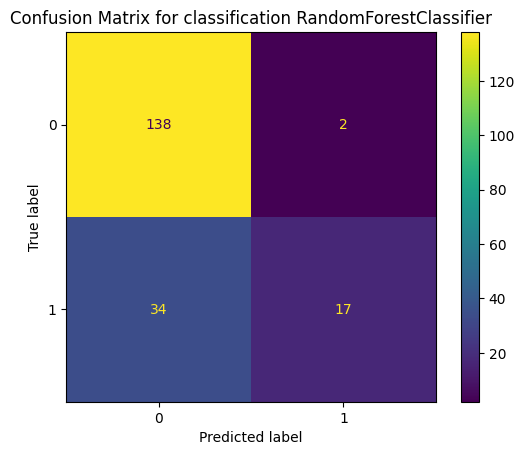

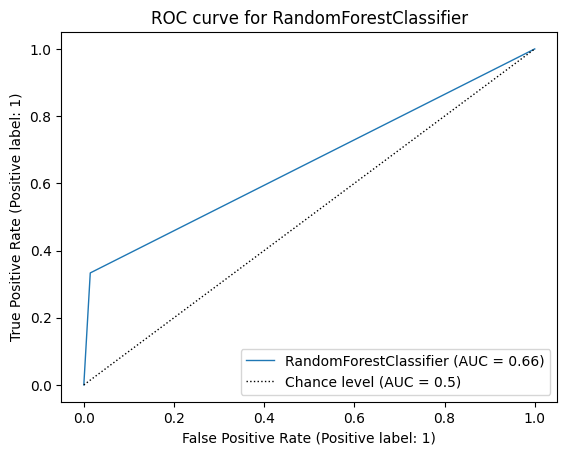

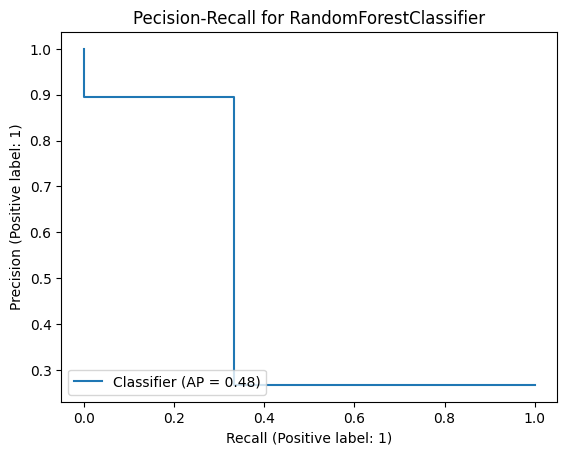

'Model score: 0.8115183246073299'

In [34]:
clf1 = RandomForestClassifier(n_estimators=100,
                               max_depth=20,
                               random_state=42
                               )

pipe_RFC = evaluator_model(clf1, df_=df.copy())
pipe_RFC

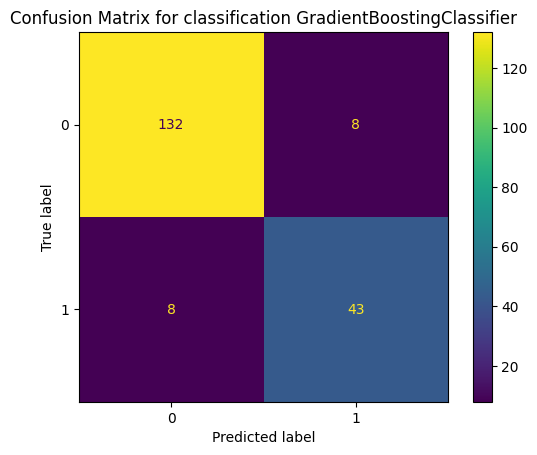

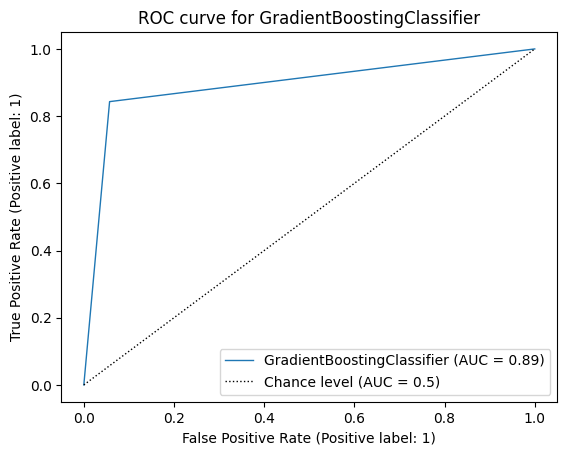

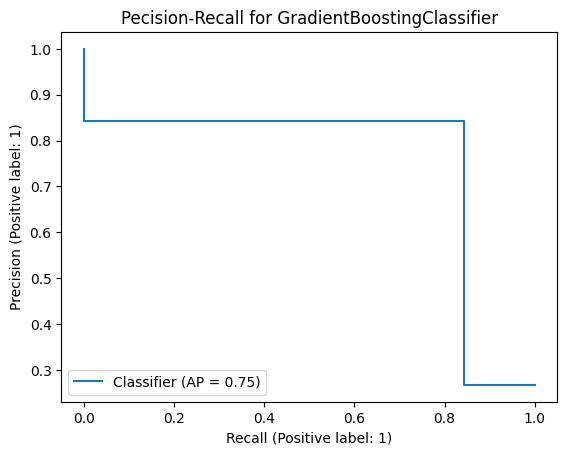

'Model score: 0.9162303664921466'

In [35]:
clf2 = GradientBoostingClassifier(n_estimators=100,
                               max_depth=20,
                               random_state=42
                               )

pipe_GBC = evaluator_model(clf2, df_=df.copy())
pipe_GBC

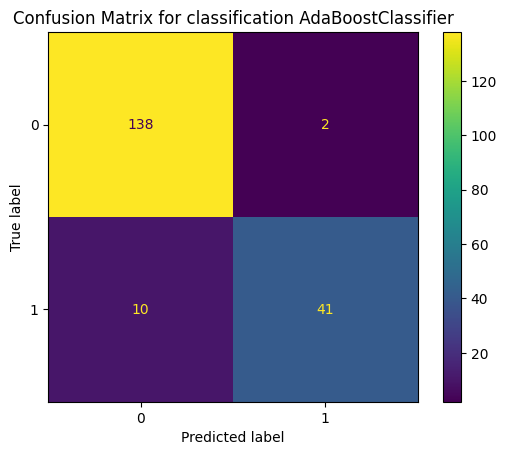

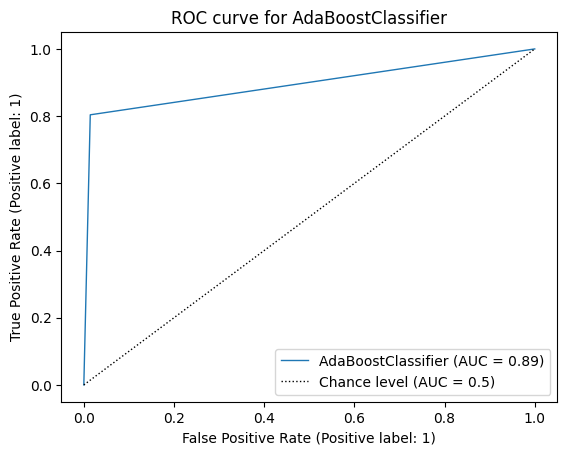

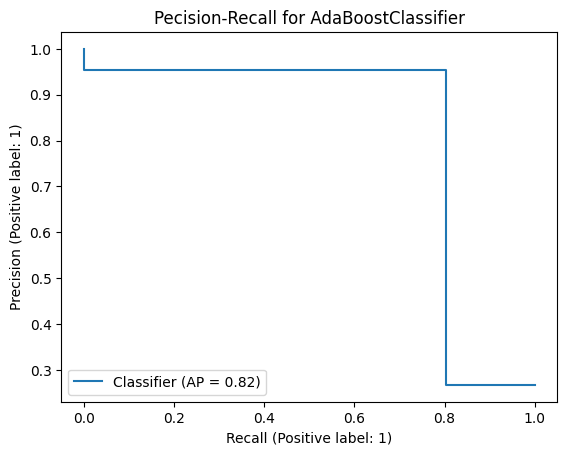

'Model score: 0.93717277486911'

In [36]:
clf3 = AdaBoostClassifier(n_estimators=100,
                            learning_rate=0.5,
                            random_state=42
                            )

pipe_ABC = evaluator_model(clf3, df_=df.copy())
pipe_ABC

In [45]:
clf3.algorithm

'SAMME.R'

Ok. let's stay with the ADA classifier